<a href="https://colab.research.google.com/github/pravincoder/Fundamentals_tensorflow/blob/main/Part_4_MultiClass_Classification_using_FashionMnist_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with a larger example (multiclass classification)


### **Problem**:- Fashion/Dress Classification problem

when we have more than 2 classes as an option , its know as **Multi-Class Classification**.

#### In this problem we have to classify different images of clothing by building a neural network using multi-class classification.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
# The data is already been sorted in training and test sets for us.
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()
# More info link = https://www.tensorflow.org/datasets/catalog/fashion_mnist

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#Check the first training example
print(f"Training Sample:\n{train_data[0]}\n train Label:\n {train_labels[0]}" )
print(f"Test Sample: \n {test_data[0]}\n test Label: \n {test_labels[0]}")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

## Labels name and Number of each label
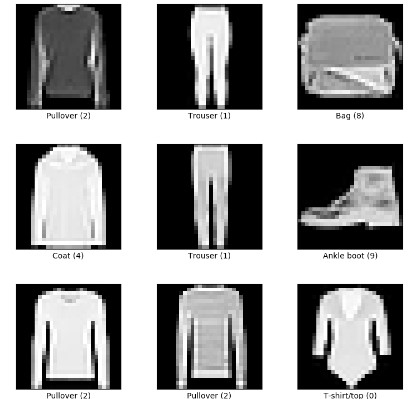

In [ ]:
# Get shape of data
train_data[0].shape,test_data[0].shape

((28, 28), (28, 28))

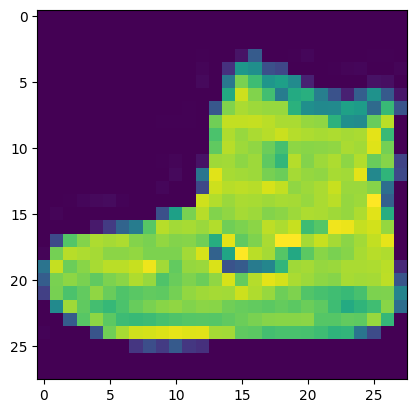

In [ ]:
# Plot a sample 
plt.imshow(train_data[0]);


In [ ]:

# Check Sample label
(train_labels[0])

9

In [ ]:
# Get the labels human read able name of each number label
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneker","Bag","Ankle Boot"]
len(label_names)

10

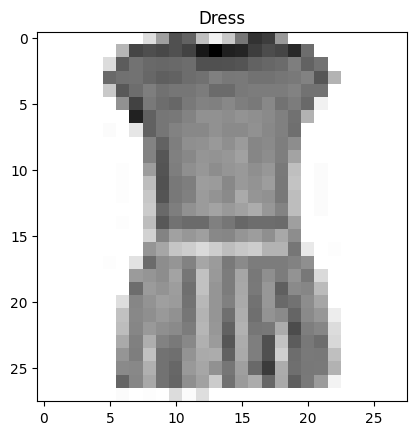

In [ ]:
def label_info(index_choice):
  plt.imshow(train_data[index_choice],cmap=plt.cm.binary)
  plt.title(label_names[train_labels[index_choice]])
  
index_choice = 3
label_info(index_choice)

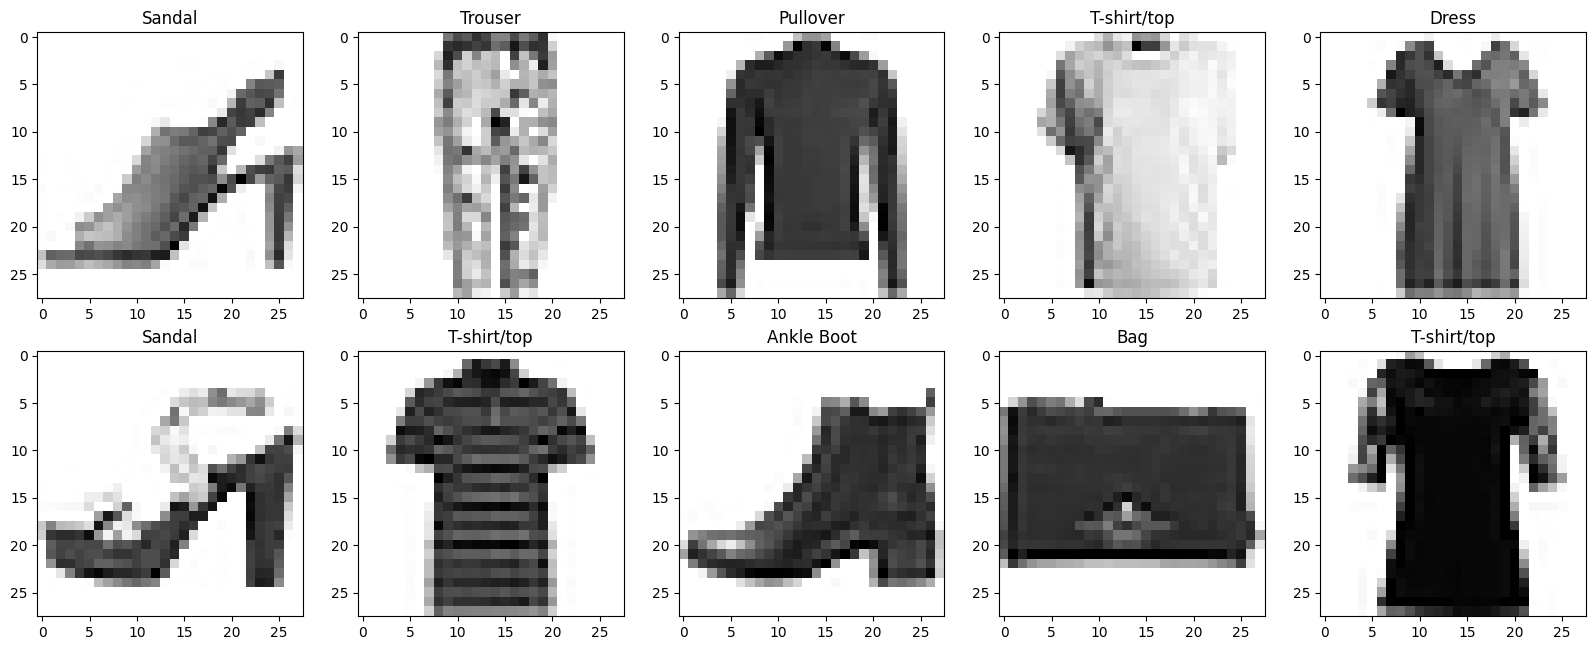

In [ ]:
# lets plot multiple random images of fashion mnist
import random
plt.figure(figsize=(20,20))
for i in range(10):
  ax = plt.subplot(5,5,i+1)
  rand_index = random.choice(range(len(train_data)))
  label_info(rand_index)

# Building a Multi-Class Classifattion Model

#### for our multi-class classification , we can first try the simalar archictecture to our binary classifier :

* Input Shape= 28X28 (Shape of one img)
* Output Shape = 10 (one per class of clothing)
* Loss Function = tf.keras.losses.CategoricalCrossentropy()
  * If *labels are one_hot encoded*, use CategoricalCrossentropy()
  * If *labels are integer form* , use SparseCategoricalCrossentropy() 
* Output Layer Activation = Softmax (Not Sigmoid)

In [ ]:
# Flatten Layer
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
28*28

784

In [ ]:
# Random Seed
tf.random.set_seed(42)

# Create the model 
model_1 = tf.keras.Sequential([
    # our data need to be flatten
    tf.keras.layers.Flatten(input_shape=(28,28,),name="FLatten_layer"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation='Softmax')
])
# Compile
model_1.compile(optimizer='Adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

# Fit
non_norm_history = model_1.fit(train_data,
                               tf.one_hot(train_labels,depth=10),
                               epochs=10,
                               validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 15s 6ms/step - loss: 2.1072 - accuracy: 0.2116 - val_loss: 1.8916 - val_accuracy: 0.1928
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 1.7637 - accuracy: 0.2719 - val_loss: 1.6489 - val_accuracy: 0.3323
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5769 - accuracy: 0.3417 - val_loss: 1.4495 - val_accuracy: 0.4138
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3463 - accuracy: 0.4300 - val_loss: 1.2759 - val_accuracy: 0.4584
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2544 - accuracy: 0.4591 - val_loss: 1.2443 - val_accuracy: 0.4622
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1318 - accuracy: 0.5372 - val_loss: 1.0996 - val_accuracy: 0.5535
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0456 - accuracy: 0.5609 - val_loss: 1.0713 - val_accuracy

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FLatten_layer (Flatten)     (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,390
Trainable params: 8,390
Non-trainable params: 0
_________________________________________________________________


### Normalization 
##### Neural network prefer data to be in scaled (NORMALIZED) , this means the generally have number in the from of tensor's between 0 & 1.

In [ ]:
# Check the min and max value of training data
train_data.min(),train_data.max()

(0, 255)

In [19]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
norm_train_data = train_data/255.0
norm_test_data = test_data/255.0
norm_test_data.shape

(10000, 28, 28)

In [21]:
# Random Seed
tf.random.set_seed(42)

# Create Model 
Model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,),name="FLatten_layer"),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation='Softmax')
])
# Compile Model 
Model_2.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

# Fit the model
norm_history = Model_2.fit(norm_train_data,train_labels,epochs=25,validation_data=(norm_test_data,test_labels))

Epoch 1/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7012 - accuracy: 0.7546 - val_loss: 0.5063 - val_accuracy: 0.8249
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4688 - accuracy: 0.8347 - val_loss: 0.5300 - val_accuracy: 0.8202
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4380 - accuracy: 0.8453 - val_loss: 0.4709 - val_accuracy: 0.8312
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4179 - accuracy: 0.8539 - val_loss: 0.4349 - val_accuracy: 0.8502
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4070 - accuracy: 0.8573 - val_loss: 0.4723 - val_accuracy: 0.8351
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3964 - accuracy: 0.8608 - val_loss: 0.4650 - val_accuracy: 0.8354
Epoch 7/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3888 - accuracy: 0.8633 - val_loss: 0.4479 - val_accuracy:

**NOTE**- Neural network tend to prefer data in numerical form as well as scaled/normalized (numbers b/w 0 & 1)

<Axes: title={'center': 'Normalized Data'}>

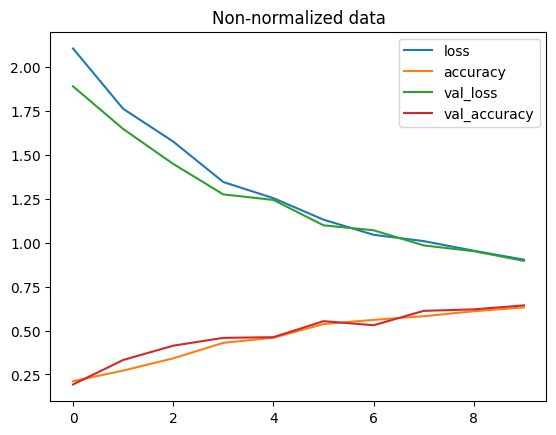

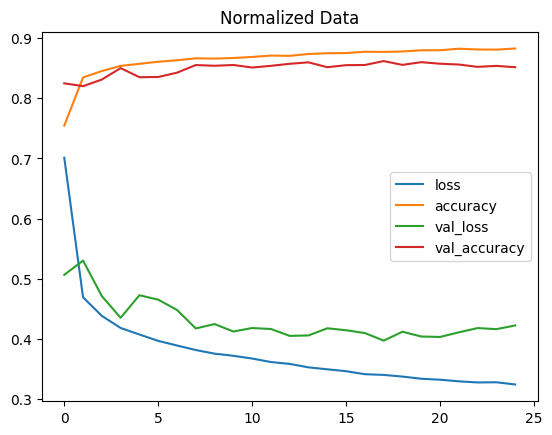

In [23]:
import pandas as pd
# Comparing both models using graph
# plot Non-Normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')
# plot Normalized data loss curve
pd.DataFrame(norm_history.history).plot(title='Normalized Data')

# Ideal Learning Rate

In [32]:
#Check the best learning rate for the model
tf.random.set_seed(42)

# Create Model 
Model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,),name="FLatten_layer"),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation='Softmax')
])
# Compile Model 
Model_3.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch/20))
# Fit the model
fit_lr_history = Model_3.fit(norm_train_data,train_labels,epochs=100,validation_data=(norm_test_data,test_labels),callbacks=[lr_scheduler])

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3151 - accuracy: 0.1192 - val_loss: 2.2904 - val_accuracy: 0.1336 - lr: 1.0000e-06
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2691 - accuracy: 0.1407 - val_loss: 2.2523 - val_accuracy: 0.1429 - lr: 1.1220e-06
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2299 - accuracy: 0.1416 - val_loss: 2.2120 - val_accuracy: 0.1367 - lr: 1.2589e-06
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1882 - accuracy: 0.1394 - val_loss: 2.1697 - val_accuracy: 0.1387 - lr: 1.4125e-06
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1469 - accuracy: 0.1484 - val_loss: 2.1297 - val_accuracy: 0.1507 - lr: 1.5849e-06
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1085 - accuracy: 0.1692 - val_loss: 2.0929 - val_accuracy: 0.1797 - lr: 1.7783e-06
Epoch 7/100
1875/1875 [=====

Text(0.5, 1.0, 'Finding the ideal learning rate')

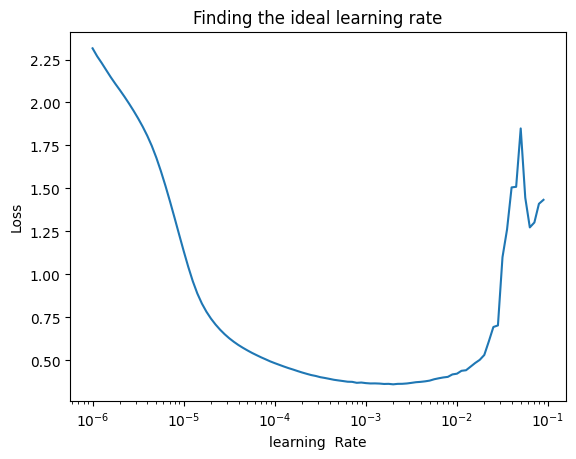

In [33]:
import matplotlib.pyplot as plt
lrs = 1e-6 * (10**(tf.range(100)/20))
plt.semilogx(lrs,fit_lr_history.history['loss'])
plt.xlabel("learning  Rate")
plt.ylabel('Loss')
plt.title("Finding the ideal learning rate")

From the above graph we can know that the ideal learning rate
---
1e-3 or 10**3

In [34]:
 # Random Seed
tf.random.set_seed(42)

# Create Model 
Model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,),name="FLatten_layer"),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation='Softmax')
])
# Compile Model 
Model_4.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

# Fit the model
history_4 = Model_4.fit(norm_train_data,train_labels,epochs=20,validation_data=(norm_test_data,test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 0.7563 - accuracy: 0.7284 - val_loss: 0.5374 - val_accuracy: 0.8083
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4805 - accuracy: 0.8316 - val_loss: 0.5292 - val_accuracy: 0.8166
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4414 - accuracy: 0.8449 - val_loss: 0.4792 - val_accuracy: 0.8235
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4190 - accuracy: 0.8532 - val_loss: 0.4679 - val_accuracy: 0.8361
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4092 - accuracy: 0.8560 - val_loss: 0.4752 - val_accuracy: 0.8320
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3976 - accuracy: 0.8588 - val_loss: 0.4566 - val_accuracy: 0.8385
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3895 - accuracy: 0.8628 - val_loss: 0.4483 - val_accuracy:

## Evaluating our Multi-class Classification Model

To Evaluate our multi-class classification model :
* Evalaute its performance using other classification metrics (such as a confusion matrix).
* Asses some of its prediction (through visualization).
* Improve its results (by training it for longer or changing the architecture).
* Save and Export it for in an applications.

In [37]:
# Create a confusion matrix
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_test,y_pred,classes=None,figsize=(10,10),text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_test,y_pred)
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normailize 
  n_classes =cm.shape[0]
  #lets prettify it
  fig,ax = plt.subplots(figsize=figsize)
  #create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues) # first cm = confusion matrix , plt.cm refers colorMap
  fig .colorbar(cax)

  #Check Classes

  if classes:
    label = classes
  else:
    label = np.arange(cm.shape[0]) 

  #label the axis
  ax.set(title = "Confusion Matrix",
        xlabel = "Prediction label",
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = label,
        yticklabels = label)

  # set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #set Threshold for different color
  threshold = (cm.max()+cm.min())/2

  #plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i,s= f"{cm[i,j]} ({cm_norm[i,j]*100:.2f}%)",
            horizontalalignment="center",
            color='white' if cm[i,j] > threshold else"black",
            size=text_size)

In [39]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [41]:
# Make some Prediction on test data
y_tpred = Model_4.predict(test_data)

#View 5 test pred
y_tpred[0:5]
print("ERROR as the training was on Normalized data so test data should be in Normalized form")

313/313 [==============================] - 1s 2ms/step
ERROR as the training was on Normalized data so test data should be in Normalized form


In [42]:
# Make some Prediction on test data
y_tpred = Model_4.predict(norm_test_data)

#View 5 test pred
y_tpred[0:5]

313/313 [==============================] - 1s 2ms/step


array([[3.4510820e-06, 3.1541336e-07, 5.5791761e-06, 2.9382996e-05,
        5.9062986e-06, 1.5267603e-02, 8.9664412e-05, 8.0135204e-02,
        9.9389069e-04, 9.0346903e-01],
       [1.8849246e-04, 8.1941906e-08, 9.7083330e-01, 2.1267482e-08,
        2.2872631e-02, 1.4839494e-25, 6.1045559e-03, 1.2838063e-31,
        8.4756260e-07, 1.5751856e-24],
       [2.3025596e-07, 9.9994618e-01, 4.6152936e-06, 1.3823748e-05,
        3.4504552e-05, 1.9813752e-16, 7.9381437e-08, 5.0098707e-18,
        4.7249736e-07, 2.6788164e-13],
       [9.0529278e-07, 9.9990577e-01, 3.5324209e-07, 8.9718968e-05,
        2.8229831e-06, 5.6183022e-15, 1.6183185e-07, 4.3711772e-18,
        9.1208641e-08, 2.8101227e-13],
       [2.3765388e-01, 9.7845703e-05, 1.5787853e-01, 1.3760655e-03,
        6.6889925e-03, 4.7837473e-10, 5.9533036e-01, 7.9439968e-14,
        9.7415963e-04, 3.6952094e-11]], dtype=float32)

**NOTE**- Remember to make prediction on same kind of data your model was trained on.

In [43]:
y_tpred[0],tf.argmax(y_tpred[0]),label_names[tf.argmax(y_tpred[0])]

(array([3.4510820e-06, 3.1541336e-07, 5.5791761e-06, 2.9382996e-05,
        5.9062986e-06, 1.5267603e-02, 8.9664412e-05, 8.0135204e-02,
        9.9389069e-04, 9.0346903e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')